In [6]:
import pandas as pd
import zipfile
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# url = 'https://raw.githubusercontent.com/esnt/Data/refs/heads/main/Names/popular_names.csv'
# df = pd.read_csv(url)

In [2]:
names_file = '/Users/lizethmendoza/Documents/STAT 386/names.zip'
with zipfile.ZipFile(names_file, 'r') as z:
    dfs = []
    files = [file for file in z.namelist() if file.endswith('.txt')]
    for file in files:
        with z.open(file) as f:
            df = pd.read_csv(f)
            df.columns = ['name', 'sex', 'count']
            df['year'] = file[3:7]
            dfs.append(df)

names = pd.concat(dfs, ignore_index=True)

In [5]:
name_interest = 'Lizeth'
sex_interest = 'F'
names_df = names[(names['name'] == name_interest) & (names['sex'] == sex_interest)]
names_df.head()

,name,sex,count,year
718474,Lizeth,F,7,1971
732479,Lizeth,F,9,1972
746430,Lizeth,F,14,1973
763436,Lizeth,F,10,1974
779450,Lizeth,F,11,1975


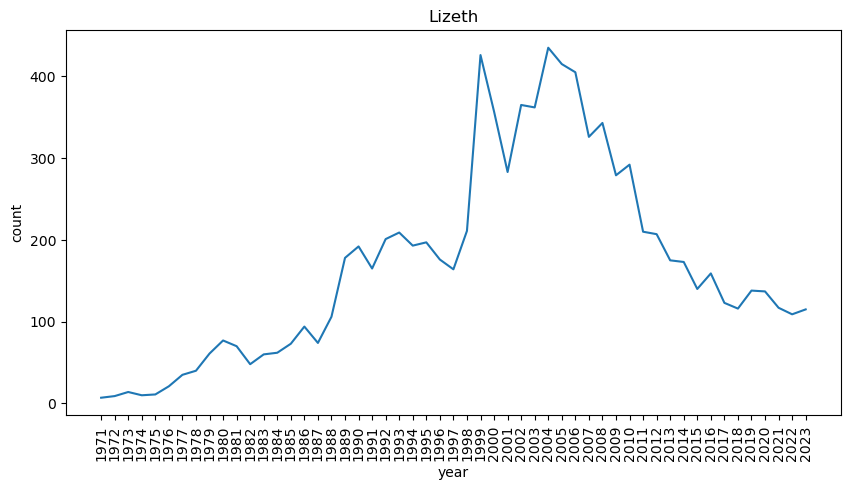

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x=names_df['year'], y=names_df['count'])
plt.title(name_interest)
plt.xlabel('year')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [8]:
names.to_csv('all_names.csv', index=False)